In [27]:
import numpy as np
from logisticregression import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [28]:
data = load_iris()
X = data.data
y = data.target

In [29]:
X.shape, y.shape

((100, 2), (100,))

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3, random_state=1)

In [31]:
%%time

model = LogisticRegression(n_iter=200, eta=0.0001, random_state=1)
model.fit(Xtrain, ytrain)

Wall time: 4 ms


LogisticRegression({'n_iter': 200, 'eta': 0.0001, 'threshold': 0.5, 'random_state': 1, 'rs': RandomState(MT19937) at 0x249D35B7140, 'w': array([ 1.62286608, -0.77019727,  0.30378249])})

In [32]:
model.score(Xtrain, ytrain)

0.9848484848484849

In [33]:
model.score(Xtest, ytest)

1.0

In [34]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

<ipython-input-34-63f4c679b521>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


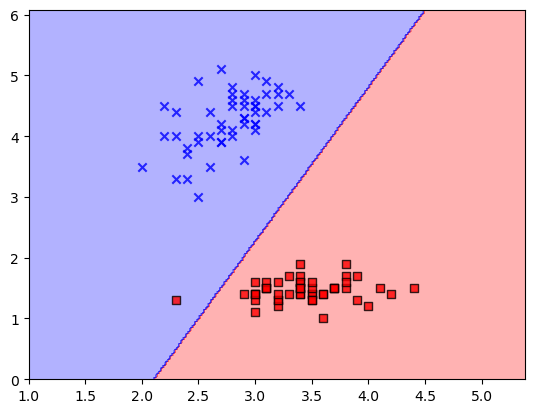

In [35]:
plot_decision_regions(X, y, classifier=model)
plt.show()